In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:05<00:00, 42.7MB/s]
100% 163M/163M [00:05<00:00, 30.5MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("we have extracted the dataset")

we have extracted the dataset


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['with_mask_2489.jpg', 'with_mask_1587.jpg', 'with_mask_2695.jpg', 'with_mask_877.jpg', 'with_mask_2167.jpg']
['with_mask_1577.jpg', 'with_mask_1172.jpg', 'with_mask_2014.jpg', 'with_mask_1554.jpg', 'with_mask_549.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])


['without_mask_1039.jpg', 'without_mask_239.jpg', 'without_mask_3040.jpg', 'without_mask_1821.jpg', 'without_mask_2698.jpg']
['without_mask_3109.jpg', 'without_mask_2718.jpg', 'without_mask_2910.jpg', 'without_mask_1397.jpg', 'without_mask_630.jpg']


In [10]:
print('Number of masked images = ', len(with_mask_files))
print('Number of unmasked images = ', len(without_mask_files))


Number of masked images =  3725
Number of unmasked images =  3828


In [11]:
#CREATING LABELS
#WITH MASK --> 1
#WITHOUT MASK --> 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [12]:
labels = with_mask_labels + without_mask_labels

In [13]:
print(len(labels))

7553


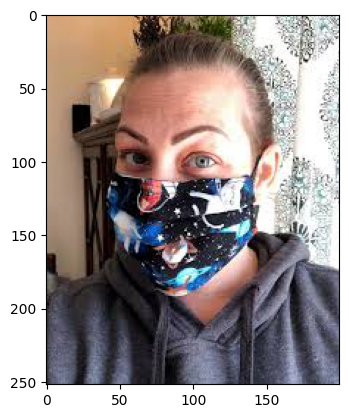

In [14]:
#DISPLAYING THE IMAGES
img = mpimg.imread('/content/data/with_mask/with_mask_2489.jpg')
imgplot = plt.imshow(img)
plt.show()

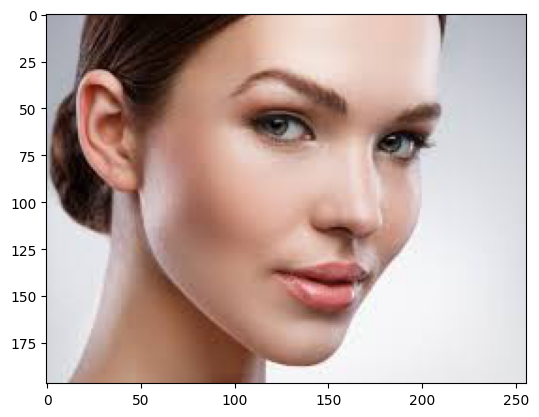

In [15]:
#DISPLAYING THE IMAGES WITHOUT MASK
img = mpimg.imread('/content/data/without_mask/without_mask_1039.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
#IMAGE PROCESSING

#resize the images and convert them to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[214, 166, 128],
        [215, 165, 128],
        [214, 164, 126],
        ...,
        [217, 222, 222],
        [170, 174, 175],
        [205, 207, 208]],

       [[214, 166, 128],
        [215, 165, 128],
        [214, 164, 126],
        ...,
        [166, 171, 172],
        [217, 220, 221],
        [176, 178, 180]],

       [[214, 166, 128],
        [214, 166, 128],
        [213, 165, 126],
        ...,
        [156, 161, 162],
        [178, 182, 183],
        [223, 225, 226]],

       ...,

       [[ 44,  46,  57],
        [ 79,  81,  94],
        [ 85,  87, 103],
        ...,
        [127, 134, 162],
        [128, 135, 163],
        [119, 126, 154]],

       [[ 40,  42,  52],
        [ 67,  69,  82],
        [ 90,  92, 108],
        ...,
        [135, 142, 171],
        [130, 137, 166],
        [118, 126, 155]],

       [[ 36,  38,  48],
        [ 65,  67,  80],
        [ 87,  90, 106],
        ...,
        [122, 129, 159],
        [140, 147, 176],
        [131, 140, 169]]

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [27]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [28]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
X_train_scaled[0]

array([[[0.41176471, 0.40784314, 0.41176471],
        [0.38039216, 0.37647059, 0.37647059],
        [0.37647059, 0.37647059, 0.37647059],
        ...,
        [0.23921569, 0.27843137, 0.26666667],
        [0.24313725, 0.27843137, 0.26666667],
        [0.24705882, 0.2745098 , 0.27058824]],

       [[0.4       , 0.40392157, 0.4       ],
        [0.37647059, 0.37647059, 0.37647059],
        [0.38823529, 0.38039216, 0.38431373],
        ...,
        [0.2       , 0.23137255, 0.22745098],
        [0.20392157, 0.23137255, 0.22745098],
        [0.20392157, 0.22745098, 0.23137255]],

       [[0.4       , 0.4       , 0.4       ],
        [0.39607843, 0.39607843, 0.39607843],
        [0.36862745, 0.35686275, 0.36078431],
        ...,
        [0.16078431, 0.18039216, 0.18823529],
        [0.15686275, 0.17647059, 0.18823529],
        [0.15294118, 0.18039216, 0.18823529]],

       ...,

       [[0.41176471, 0.82745098, 0.9372549 ],
        [0.34509804, 0.75294118, 0.83529412],
        [0.23529412, 0

In [31]:
#BUILDING A CNN

import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3))) #32 is the filters
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu')) #64 is the filters, and we do not need input shape
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5)) #to prevent overfitting, it turns off some of the neurons

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5)) #to prevent overfitting, it turns off some of the neurons

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [33]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [34]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4914 - acc: 0.8047 - val_loss: 0.3296 - val_acc: 0.8612
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2898 - acc: 0.8850 - val_loss: 0.2572 - val_acc: 0.8826
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2355 - acc: 0.9097 - val_loss: 0.2838 - val_acc: 0.8727
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2013 - acc: 0.9229 - val_loss: 0.2143 - val_acc: 0.9041
Epoch 5/5
170/170 [==============================] - 4s 24ms/step - loss: 0.1646 - acc: 0.9375 - val_loss: 0.2164 - val_acc: 0.9223


In [35]:
#EVALUATING THE MODEL

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("The test accuracy is: ", accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2035 - acc: 0.9193
The test accuracy is:  0.9192587733268738


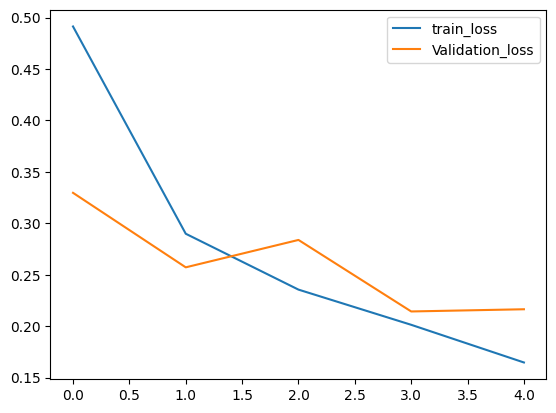

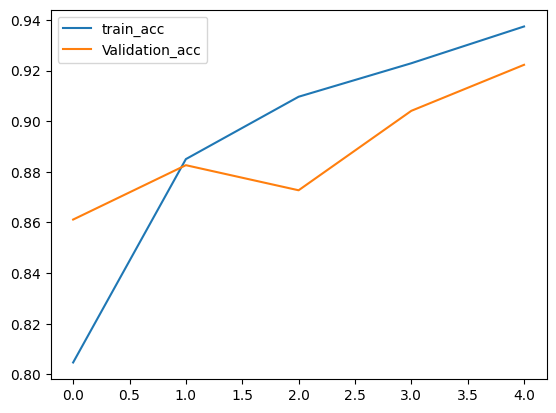

In [36]:
h = history

#plotting the loss value
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'Validation_loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train_acc')
plt.plot(h.history['val_acc'], label = 'Validation_acc')
plt.legend()
plt.show()


path of the image to be predicted: /content/test4.jpg


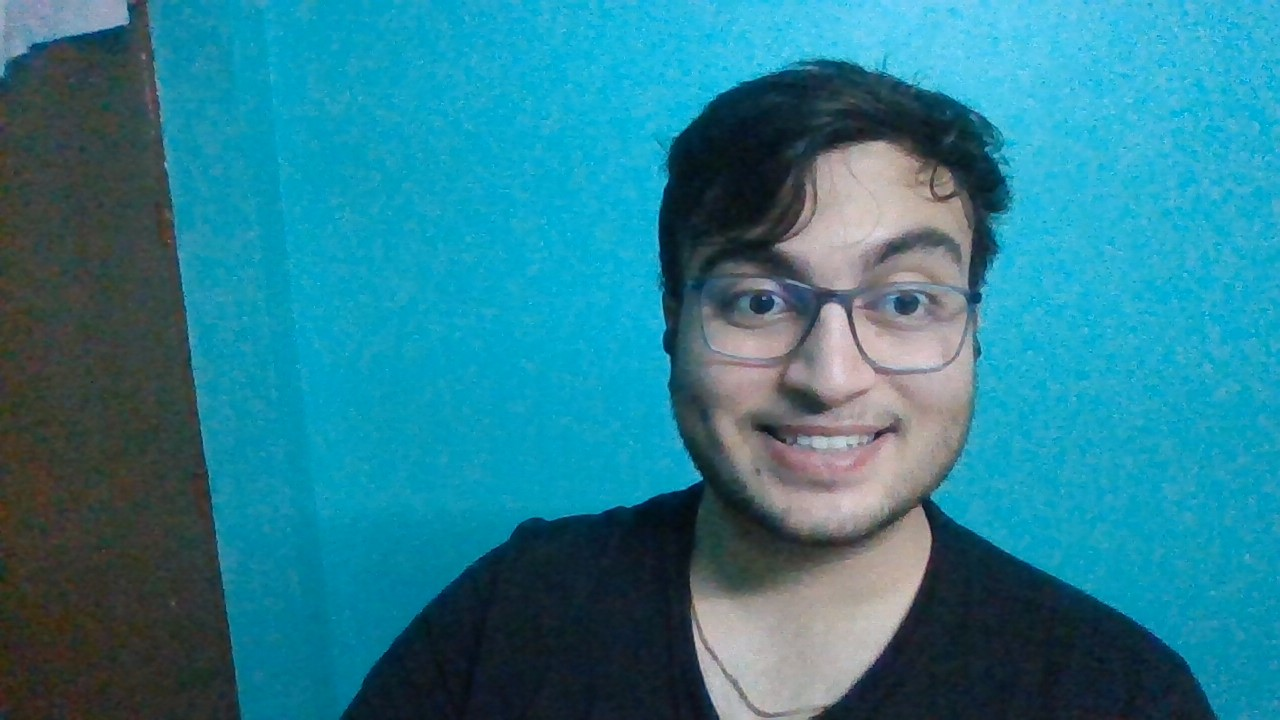

1/1 [==============================] - 0s 33ms/step
[[0.65240544 0.29889405]]
Person is NOT WEARING a mask


In [44]:
#PREDICTIVE SYSTEM
from google.colab.patches import cv2_imshow
input_image_path = input('path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label ==1:
  print('Person is WEARING a mask')
else:
  print('Person is NOT WEARING a mask')